<a href="https://colab.research.google.com/github/ran-cao/Covid-Impact-on-People-Goods-Mobility/blob/master/code_Ran_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How has COVID-19 affected mobility of people and good across the globe?


### Preparation - Setting up environment and packages; data input

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 204.2MB 69kB/s 
     |████████████████████████████████| 204kB 40.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=962417c86d6de1d073f00c4af1369e7ff22796d2be5c0482d676fa17a19fe0f5
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [ ]:
# Spark setup
import findspark
findspark.init("spark-3.0.1-bin-hadoop2.7")# SPARK_HOME

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
urls = ["1H3bKORdFpmYRxaUX_SUVCUbrUNYSpINR",'1VAOES2v2NdaAzMF0uipVU_yMbAUYuONr', '1v91yXhrajRDewzg9HhinbkuNKy8LyMbt', '1WUqMEEdM9RowhN11iF0oYOvmh8zzU9os', '1b6QMl1mfbG6DGpihpudliJ9gB_hQKPkc', '1LbJKYh8pgTYPS2NTiC4AhzfXe8GKBbfr', '1_BSRy4qg_S3e0fOXtyZ8lBscDX_YegM6', '1t1xbKdkaCsDrnNH6wX-4Sdiw_MP-bxAu', '1gXHLTPSLLBvqdegMs-E0oFGGd8xbDE3f', '1uK5RR8K_mnllnIitsBKOKCyU1NtBaoIq', '1GB0GpRsSsdRSU2j11O620UECc49V4T0T', '1rFQFqm5d2hV2SmDFXThkDKwAhgtdFbwb']
names = ['mobility_report_all.csv', 'city_congestion.csv', 'comm_traffic_industry.csv', 'comm_traffic.csv', 'fuel_daily.csv', 'fuel_weekly.csv', 'geo_info.csv', 'lookup_region.csv', 'port_traffic.csv', 'us_airport.csv', 'us_border_vol.csv', 'us_border_waittime.csv']

for i in range(len(urls)):
  file = drive.CreateFile({'id':urls[i]})
  file.GetContentFile(names[i])
'''
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv')
'''

"\ndownloaded = drive.CreateFile({'id':id}) \ndownloaded.GetContentFile('Filename.csv')  \ndf3 = pd.read_csv('Filename.csv')\n"

In [ ]:
#list of datasets
'''
mobility_report_all
city_congestion
comm_traffic_industry
comm_traffic
fuel_daily
fuel_weekly
geo_info
lookup_region
port_traffic
us_airport
us_border_vol
us_border_waittime
'''

In [ ]:
##creating pandas and spark df
mobility_report = pd.read_csv('mobility_report_all.csv')
mobility_report_spark = spark.read.format("csv").option("header", "true").load("mobility_report_all.csv")
mobility_report_spark.registerTempTable('mobility_report_sql')

city_congestion = pd.read_csv('city_congestion.csv')
city_congestion_spark = spark.read.format("csv").option("header", "true").load("city_congestion.csv")
city_congestion_spark.registerTempTable('city_congestion_sql')

comm_traffic_industry = pd.read_csv('comm_traffic_industry.csv')
comm_traffic_industry_spark = spark.read.format("csv").option("header", "true").load("comm_traffic_industry.csv")
comm_traffic_industry_spark.registerTempTable('comm_traffic_industry_sql')

comm_traffic = pd.read_csv('comm_traffic.csv')
comm_traffic_spark = spark.read.format("csv").option("header", "true").load("comm_traffic.csv")
comm_traffic_spark.registerTempTable('comm_traffic_sql')

fuel_daily = pd.read_csv('fuel_daily.csv')
fuel_daily_spark = spark.read.format("csv").option("header", "true").load("fuel_daily.csv")
fuel_daily_spark.registerTempTable('fuel_daily_sql')

fuel_weekly = pd.read_csv('fuel_weekly.csv')
fuel_weekly_spark = spark.read.format("csv").option("header", "true").load("fuel_weekly.csv")
fuel_weekly_spark.registerTempTable('fuel_weekly_spl')

geo_info = pd.read_csv('geo_info.csv')
geo_info_spark = spark.read.format("csv").option("header", "true").load("geo_info.csv")
geo_info_spark.registerTempTable('geo_info_sql')

lookup_region = pd.read_csv('lookup_region.csv')
lookup_region_spark = spark.read.format("csv").option("header", "true").load("lookup_region.csv")
lookup_region_spark.registerTempTable('lookup_region_sql')

port_traffic = pd.read_csv('port_traffic.csv')
port_traffic_spark = spark.read.format("csv").option("header", "true").load("port_traffic.csv")
port_traffic_spark.registerTempTable('port_traffic_sql')

us_airport = pd.read_csv('us_airport.csv')
us_airport_spark = spark.read.format("csv").option("header", "true").load("us_airport.csv")
us_airport_spark.registerTempTable('us_airport_sql')

us_border_vol = pd.read_csv('us_border_vol.csv')
us_border_vol_spark = spark.read.format("csv").option("header", "true").load("us_border_vol.csv")
us_border_vol_spark.registerTempTable('us_border_vol_sql')

us_border_waittime = pd.read_csv('us_border_waittime.csv')
us_border_waittime_spark = spark.read.format("csv").option("header", "true").load("us_border_waittime.csv")
us_border_waittime_spark.registerTempTable('us_border_waittime_sql')



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration

In [ ]:
#historical trend
historical = spark.sql('select date, AVG(retail_and_recreation_percent_change_from_baseline) as retail_recreation_change,   AVG(grocery_and_pharmacy_percent_change_from_baseline) as grocery_pharmacy_change, AVG(parks_percent_change_from_baseline) as parks_change, \
                        AVG(transit_stations_percent_change_from_baseline) as transit_stations_change, AVG(workplaces_percent_change_from_baseline) as workplace_change, AVG(residential_percent_change_from_baseline) as residential_change \
                         from mobility_report_sql \
                         GROUP BY date order by date asc'
                       )
historical.show(100)

+----------+------------------------+-----------------------+-------------------+-----------------------+-------------------+--------------------+
|      date|retail_recreation_change|grocery_pharmacy_change|       parks_change|transit_stations_change|   workplace_change|  residential_change|
+----------+------------------------+-----------------------+-------------------+-----------------------+-------------------+--------------------+
|2020-02-15|       2.969476082004556|     1.3240256653992395|  2.459021502025553|     1.9108927955877284|  2.021807580174927|-0.01748990966749952|
|2020-02-16|       2.950518555541672|                1.40375|0.06295436968290796|     0.7573199209628166|0.19483286722599547|    0.23186737278379|
|2020-02-17|      1.2716573647173017|   0.004196139551612517|  5.119480987565327|     0.6346280447662936|-2.0468175128771153|  1.1644862360316162|
|2020-02-18|      0.7995944172730526|    0.18917304015296368| 3.4902869363749778|     0.7312789927104042|  2.964978398

In [ ]:
# number of country region
country_region = spark.sql('select distinct country_region from mobility_report_sql')
country_region.show(50)

+--------------+
|country_region|
+--------------+
| Côte d'Ivoire|
|      Paraguay|
|        Russia|
|         Yemen|
|       Senegal|
|        Sweden|
|   Philippines|
|      Malaysia|
|     Singapore|
|          Fiji|
|        Turkey|
|          Iraq|
|       Germany|
|      Cambodia|
|   Afghanistan|
|        Jordan|
|        Rwanda|
|        France|
|        Greece|
|     Sri Lanka|
|        Taiwan|
|          Togo|
|      Slovakia|
|     Argentina|
|        Angola|
|       Belgium|
|       Ecuador|
|         Qatar|
|       Finland|
|     Nicaragua|
|         Ghana|
|         Benin|
|          Peru|
|         India|
| United States|
|       Belarus|
|        Kuwait|
|         Malta|
|         Chile|
|   Puerto Rico|
|    Tajikistan|
|       Croatia|
|       Bolivia|
|       Nigeria|
|         Gabon|
|         Italy|
|       Réunion|
|     Lithuania|
|        Norway|
|         Spain|
+--------------+
only showing top 50 rows



In [ ]:
keep_these = ["date","daily_confirmed_cases","daily_deaths","confirmed_cases","deaths"]

In [ ]:
geo_info_us = geo_info[(geo_info['geo_id']=='US')&(geo_info['date']>'2020-01-01')]
geo_info_us = geo_info_us[keep_these]
geo_info_us.head(10)

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths
40795,2020-01-02,0,0,0,0
40796,2020-01-03,0,0,0,0
40797,2020-01-04,0,0,0,0
40798,2020-01-05,0,0,0,0
40799,2020-01-06,0,0,0,0
40800,2020-01-07,0,0,0,0
40801,2020-01-08,0,0,0,0
40802,2020-01-09,0,0,0,0
40803,2020-01-10,0,0,0,0
40804,2020-01-11,0,0,0,0


In [ ]:
city_congestion.head(10)

,city_name,date_time,percent_congestion
0,Atlanta,2020-02-09 10:00:00,34.106249
1,Atlanta,2020-02-10 11:00:00,51.254382
2,Atlanta,2020-02-10 20:00:00,31.305064
3,Atlanta,2020-02-11 13:00:00,52.517551
4,Atlanta,2020-02-18 20:00:00,33.773395
5,Atlanta,2020-02-25 19:00:00,42.727377
6,Atlanta,2020-03-02 00:00:00,16.825703
7,Atlanta,2020-03-02 04:00:00,10.712307
8,Atlanta,2020-03-16 19:00:00,26.869191
9,Atlanta,2020-03-23 23:00:00,14.120683


In [ ]:
comm_traffic_usa = comm_traffic[(comm_traffic['alpha_code_3']=='USA')]
comm_traffic_usa.head(100)

,alpha_code_3,country_iso_code_2,region,date,day_of_week,percent_of_baseline_activity,percent_of_baseline_commercial,percent_of_baseline_industrial,percent_of_baseline_warehouse,percent_of_baseline_grocery_store,percent_of_baseline_other_retail
117,USA,NaN,NaN,2020-05-12,3,89,79.0,84.0,90.0,93.0,82.0
229,USA,NaN,NaN,2020-07-09,5,97,89.0,96.0,101.0,100.0,94.0
318,USA,NaN,NaN,2020-04-11,7,77,66.0,69.0,85.0,83.0,62.0
522,USA,NaN,NaN,2020-04-05,1,81,68.0,84.0,99.0,80.0,63.0
629,USA,NaN,NaN,2020-07-20,2,100,94.0,98.0,106.0,105.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...
12561,USA,NaN,NaN,2020-05-20,4,91,82.0,87.0,94.0,96.0,87.0
12611,USA,NaN,NaN,2020-07-24,6,95,89.0,95.0,100.0,97.0,92.0
12795,USA,NaN,NaN,2020-06-03,4,94,86.0,91.0,96.0,98.0,90.0
12932,USA,NaN,NaN,2020-05-02,7,87,73.0,76.0,97.0,87.0,75.0


In [ ]:
comm_traffic_industry.head(100)

,alpha_code_3,region,industry,date,percent_of_baseline,version
0,CAN,NaN,Real Estate,2020-06-22,130.0,1.1
1,CAN,NaN,Telecommunications,2020-06-22,95.0,1.1
2,CAN,NaN,"Waste Treatment, Environmental Services & Recy...",2020-06-22,119.0,1.1
3,CAN,NaN,Business Services,2020-06-22,112.0,1.1
4,CAN,NaN,Transportation (non-freight),2020-06-22,92.0,1.1
...,...,...,...,...,...,...
95,USA,NaN,Construction,2020-02-06,94.0,1.1
96,USA,NaN,Manufacturing,2020-02-06,97.0,1.1
97,USA,NaN,Finance,2020-02-06,101.0,1.1
98,USA,NaN,Retail,2020-02-06,96.0,1.1


**Comm traffic industry**

In [ ]:
comm_traffic_industry['alpha_code_3'].unique()
comm_traffic_industry['region'].unique()
comm_traffic_industry['industry'][comm_traffic_industry['alpha_code_3']=='USA'].unique()

array(['Healthcare Services & Hospitals', 'Insurance',
       'Waste Treatment, Environmental Services & Recycling',
       'Hospitality', 'Education', 'Real Estate', 'Minerals & Mining',
       'Manufacturing', 'Energy & Utilities', 'Agriculture',
       'Consumer Services', 'Government', 'Freight & Logistics Services',
       'Media & Internet', 'Retail', 'Telecommunications',
       'Holding Companies & Conglomerates',
       'Transportation (non-freight)', 'Finance', 'Business Services',
       'Construction', 'Organizations'], dtype=object)

In [ ]:
comm_traffic_industry_us = comm_traffic_industry[(comm_traffic_industry['alpha_code_3']=='USA')]

In [ ]:
comm_traffic_industry_us['industry'].unique()

array(['Healthcare Services & Hospitals', 'Insurance',
       'Waste Treatment, Environmental Services & Recycling',
       'Hospitality', 'Education', 'Real Estate', 'Minerals & Mining',
       'Manufacturing', 'Energy & Utilities', 'Agriculture',
       'Consumer Services', 'Government', 'Freight & Logistics Services',
       'Media & Internet', 'Retail', 'Telecommunications',
       'Holding Companies & Conglomerates',
       'Transportation (non-freight)', 'Finance', 'Business Services',
       'Construction', 'Organizations'], dtype=object)

In [ ]:
Healthcare_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Healthcare Services & Hospitals')]
Insurance_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Insurance')]
Waste_Treatment_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Waste Treatment, Environmental Services & Recycling')]
Hospitality_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Hospitality')]
Education_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Education')]
Real_Estate_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Real Estate')]
Minerals_Mining_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Minerals & Mining')]
Manufacturing_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Manufacturing')]
Energy_Utilities_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Energy & Utilities')]
Agriculture_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Agriculture')]
Consumer_Services_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Consumer Services')]
Government_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Government')]
Logistics_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Freight & Logistics Services')]
Media_IT_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Media & Internet')]
Retail_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Retail')]
Telecommunications_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Telecommunications')]
HoldingCompanies_Conglomerates_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Holding Companies & Conglomerates')]
Transportation_Conglomerates_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Transportation (non-freight)')]
Finance_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Finance')]
Business_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Business Services')]
Construction_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Construction')]
Organizations_US = comm_traffic_industry_us[(comm_traffic_industry['industry']=='Organizations')]


Retail_US

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to ma

,alpha_code_3,region,industry,date,percent_of_baseline,version
32,USA,NaN,Retail,2020-06-22,94.0,1.1
98,USA,NaN,Retail,2020-02-06,96.0,1.1
164,USA,NaN,Retail,2020-05-01,83.0,1.1
247,USA,NaN,Retail,2020-03-27,80.0,1.1
312,USA,NaN,Retail,2020-09-06,92.0,1.1
...,...,...,...,...,...,...
15238,USA,NaN,Retail,2020-07-23,96.0,1.1
15300,USA,NaN,Retail,2020-08-15,87.0,1.1
15370,USA,NaN,Retail,2020-09-02,97.0,1.1
15438,USA,NaN,Retail,2020-07-10,93.0,1.1


In [ ]:
cols_to_keep = ["date","percent_of_baseline"]

In [ ]:
#remove_others(Retail_US, {"industry","date","percent_of_baseline"})
Retail_US = Retail_US[cols_to_keep]
Retail_US.columns =['date', 'Retail'] 

In [ ]:
left_join_us = pd.merge(geo_info_us, Retail_US, on='date')
left_join_us 



,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,Retail
0,2020-02-01,1,0,7,0,97.0
1,2020-02-02,1,0,8,0,95.0
2,2020-02-03,3,0,11,0,98.0
3,2020-02-04,0,0,11,0,99.0
4,2020-02-05,0,0,11,0,96.0
...,...,...,...,...,...,...
223,2020-09-11,37507,974,6397227,191789,97.0
224,2020-09-12,48061,1227,6445288,193016,95.0
225,2020-09-13,40820,685,6486108,193701,100.0
226,2020-09-14,33871,378,6519979,194079,97.0


In [ ]:
industries = [Healthcare_US,Insurance_US,Waste_Treatment_US,Hospitality_US,Education_US,Real_Estate_US,Minerals_Mining_US,
Manufacturing_US,Energy_Utilities_US,Agriculture_US,Consumer_Services_US,Government_US,Logistics_US,
Media_IT_US,Telecommunications_US,HoldingCompanies_Conglomerates_US,Transportation_Conglomerates_US,
Finance_US,Business_US,Construction_US,Organizations_US]

In [ ]:
for i in range(0,20):
  #industries[i] = industries[i][cols_to_keep]
  left_join_us = pd.merge(left_join_us, industries[i], on='date')

In [ ]:
left_join_us.columns = ['date', 'daily_confirmed_cases', 'daily_deaths', 'confirmed_cases', 'deaths', 'Retail','Healthcare_US','Insurance_US',
                        'Waste_Treatment_US','Hospitality_US','Education_US','Real_Estate_US','Minerals_Mining_US',
                        'Manufacturing_US', 'Energy_Utilities_US', 'Agriculture_US', 'Consumer_Services_US',
                        'Government_US', 'Logistics_US','Media_IT_US', 'Telecommunications_US', 'HoldingCompanies_Conglomerates_US',
                        'Transportation_Conglomerates_US','Finance_US','Business_US','Construction_US']

In [ ]:
left_join_us.head(5)

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,Retail,Healthcare_US,Insurance_US,Waste_Treatment_US,Hospitality_US,Education_US,Real_Estate_US,Minerals_Mining_US,Manufacturing_US,Energy_Utilities_US,Agriculture_US,Consumer_Services_US,Government_US,Logistics_US,Media_IT_US,Telecommunications_US,HoldingCompanies_Conglomerates_US,Transportation_Conglomerates_US,Finance_US,Business_US,Construction_US
0,2020-02-03,3,0,11,0,98.0,101.0,92.0,99.0,103.0,105.0,101.0,99.0,99.0,100.0,96.0,98.0,105.0,99.0,100.0,100.0,99.0,109.0,103.0,97.0,104.0
1,2020-02-04,0,0,11,0,99.0,100.0,89.0,99.0,99.0,104.0,99.0,102.0,99.0,100.0,97.0,98.0,100.0,98.0,103.0,101.0,100.0,106.0,104.0,96.0,100.0
2,2020-02-05,0,0,11,0,96.0,99.0,89.0,98.0,98.0,101.0,97.0,100.0,97.0,91.0,96.0,95.0,104.0,97.0,98.0,96.0,96.0,105.0,87.0,95.0,96.0
3,2020-02-06,1,0,12,0,96.0,99.0,88.0,97.0,97.0,100.0,96.0,99.0,97.0,96.0,92.0,94.0,100.0,97.0,97.0,97.0,98.0,104.0,101.0,95.0,94.0
4,2020-02-07,0,0,12,0,97.0,100.0,93.0,100.0,97.0,104.0,98.0,103.0,98.0,99.0,93.0,97.0,101.0,98.0,101.0,100.0,102.0,106.0,104.0,97.0,98.0


In [ ]:
# delete the date effect
left_join_us_without_date = left_join_us.drop('date', 1)

In [ ]:
left_join_us_without_date.head(5)

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,Retail,Healthcare_US,Insurance_US,Waste_Treatment_US,Hospitality_US,Education_US,Real_Estate_US,Minerals_Mining_US,Manufacturing_US,Energy_Utilities_US,Agriculture_US,Consumer_Services_US,Government_US,Logistics_US,Media_IT_US,Telecommunications_US,HoldingCompanies_Conglomerates_US,Transportation_Conglomerates_US,Finance_US,Business_US,Construction_US
0,3,0,11,0,98.0,101.0,92.0,99.0,103.0,105.0,101.0,99.0,99.0,100.0,96.0,98.0,105.0,99.0,100.0,100.0,99.0,109.0,103.0,97.0,104.0
1,0,0,11,0,99.0,100.0,89.0,99.0,99.0,104.0,99.0,102.0,99.0,100.0,97.0,98.0,100.0,98.0,103.0,101.0,100.0,106.0,104.0,96.0,100.0
2,0,0,11,0,96.0,99.0,89.0,98.0,98.0,101.0,97.0,100.0,97.0,91.0,96.0,95.0,104.0,97.0,98.0,96.0,96.0,105.0,87.0,95.0,96.0
3,1,0,12,0,96.0,99.0,88.0,97.0,97.0,100.0,96.0,99.0,97.0,96.0,92.0,94.0,100.0,97.0,97.0,97.0,98.0,104.0,101.0,95.0,94.0
4,0,0,12,0,97.0,100.0,93.0,100.0,97.0,104.0,98.0,103.0,98.0,99.0,93.0,97.0,101.0,98.0,101.0,100.0,102.0,106.0,104.0,97.0,98.0


In [ ]:
covid_industry_correlation = left_join_us_without_date.corr(method="pearson")

In [ ]:
covid_industry_correlation

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,Retail,Healthcare_US,Insurance_US,Waste_Treatment_US,Hospitality_US,Education_US,Real_Estate_US,Minerals_Mining_US,Manufacturing_US,Energy_Utilities_US,Agriculture_US,Consumer_Services_US,Government_US,Logistics_US,Media_IT_US,Telecommunications_US,HoldingCompanies_Conglomerates_US,Transportation_Conglomerates_US,Finance_US,Business_US,Construction_US
daily_confirmed_cases,1.000000,0.401291,0.734714,0.775915,-0.098146,-0.478024,-0.381826,0.191375,-0.174506,-0.283967,-0.069901,-0.244298,-0.086170,-0.582609,0.553125,-0.318314,0.049351,0.024313,-0.607835,0.243720,0.157875,-0.559358,0.229606,-0.204126,0.085086
daily_deaths,0.401291,1.000000,0.133896,0.214107,-0.567551,-0.704723,-0.611842,-0.465863,-0.662516,-0.605239,-0.569895,-0.679114,-0.621700,-0.527989,-0.046080,-0.704017,-0.506255,-0.618626,-0.615659,-0.278548,-0.524564,-0.600764,0.021602,-0.683364,-0.487689
confirmed_cases,0.734714,0.133896,1.000000,0.953621,0.251862,-0.190007,-0.087310,0.489791,0.152036,0.149860,0.208722,0.121925,0.300652,-0.308724,0.812507,-0.003732,0.380652,0.352461,-0.326594,0.552567,0.590871,-0.321241,0.359203,0.145797,0.399791
deaths,0.775915,0.214107,0.953621,1.000000,0.231051,-0.297668,-0.197002,0.475954,0.078672,0.003065,0.210681,0.032437,0.244607,-0.435922,0.786069,-0.079996,0.358174,0.301439,-0.483929,0.553471,0.456726,-0.456681,0.431591,0.049277,0.373252
Retail,-0.098146,-0.567551,0.251862,0.231051,1.000000,0.801729,0.831445,0.761667,0.912764,0.816348,0.854021,0.882202,0.940316,0.495927,0.549133,0.924809,0.797121,0.930455,0.585068,0.742407,0.801205,0.614385,0.339498,0.887166,0.918359
Healthcare_US,-0.478024,-0.704723,-0.190007,-0.297668,0.801729,1.000000,0.969010,0.459894,0.883555,0.892393,0.673040,0.884648,0.780568,0.701058,0.139981,0.940704,0.599808,0.746248,0.902822,0.367796,0.636915,0.920675,0.058904,0.846893,0.654156
Insurance_US,-0.381826,-0.611842,-0.087310,-0.197002,0.831445,0.969010,1.000000,0.478062,0.892317,0.918367,0.664829,0.868307,0.796847,0.664514,0.256608,0.937125,0.621517,0.757184,0.870737,0.416223,0.673961,0.902101,0.080822,0.850938,0.694688
Waste_Treatment_US,0.191375,-0.465863,0.489791,0.475954,0.761667,0.459894,0.478062,1.000000,0.719793,0.595119,0.796326,0.660543,0.821563,0.384362,0.675794,0.657314,0.809517,0.851580,0.276211,0.871552,0.765621,0.279176,0.511873,0.722106,0.866794
Hospitality_US,-0.174506,-0.662516,0.152036,0.078672,0.912764,0.883555,0.892317,0.719793,1.000000,0.907336,0.883711,0.921484,0.936597,0.613417,0.457875,0.935356,0.861037,0.909326,0.733436,0.665209,0.800637,0.758987,0.341793,0.930363,0.856305
Education_US,-0.283967,-0.605239,0.149860,0.003065,0.816348,0.892393,0.918367,0.595119,0.907336,1.000000,0.715609,0.883783,0.845251,0.686178,0.401359,0.887173,0.751285,0.798106,0.832977,0.568040,0.805785,0.860752,0.209881,0.863429,0.758113


In [ ]:
from matplotlib import pyplot

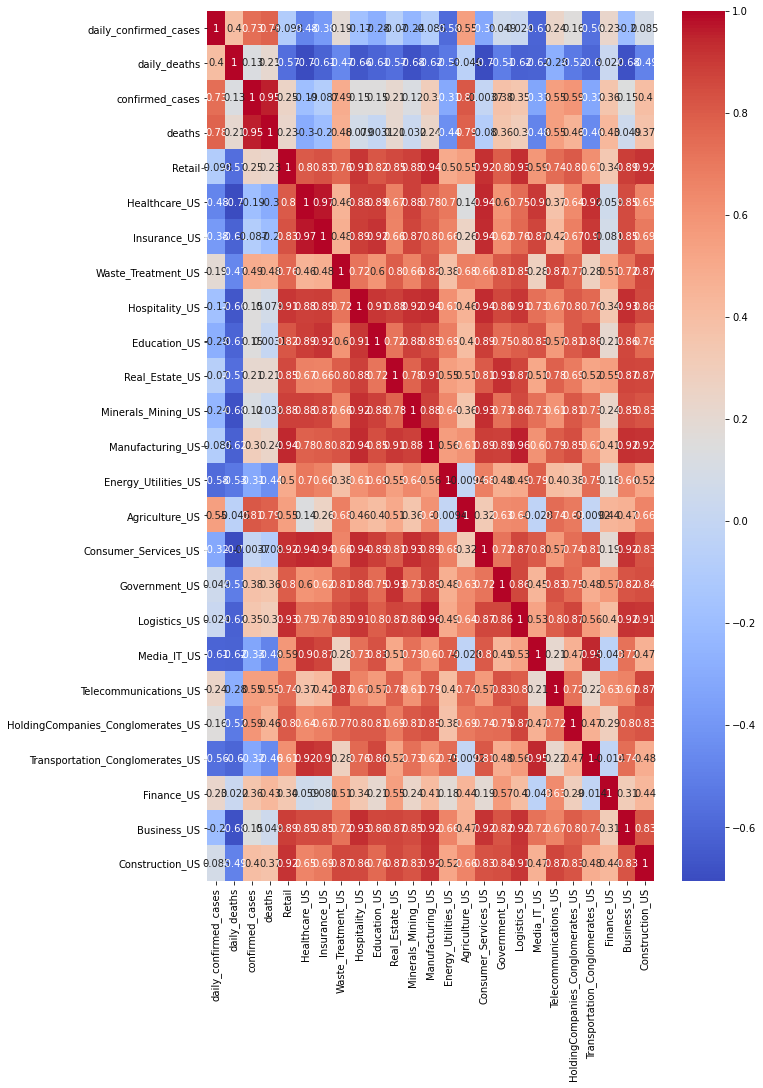

In [ ]:
import seaborn as sns
pyplot.figure(figsize=(10, 16))
sns.heatmap(covid_industry_correlation, annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
left_join_us.columns = ['date', 'daily_confirmed_cases', 'daily_deaths', 'confirmed_cases', 'deaths', 'Retail','Healthcare_US','Insurance_US',
                        'Waste_Treatment_US','Hospitality_US','Education_US','Real_Estate_US','Minerals_Mining_US',
                        'Manufacturing_US', 'Energy_Utilities_US', 'Agriculture_US', 'Consumer_Services_US',
                        'Government_US', 'Logistics_US','Media_IT_US', 'Telecommunications_US', 'HoldingCompanies_Conglomerates_US',
                        'Transportation_Conglomerates_US','Finance_US','Business_US','Construction_US']

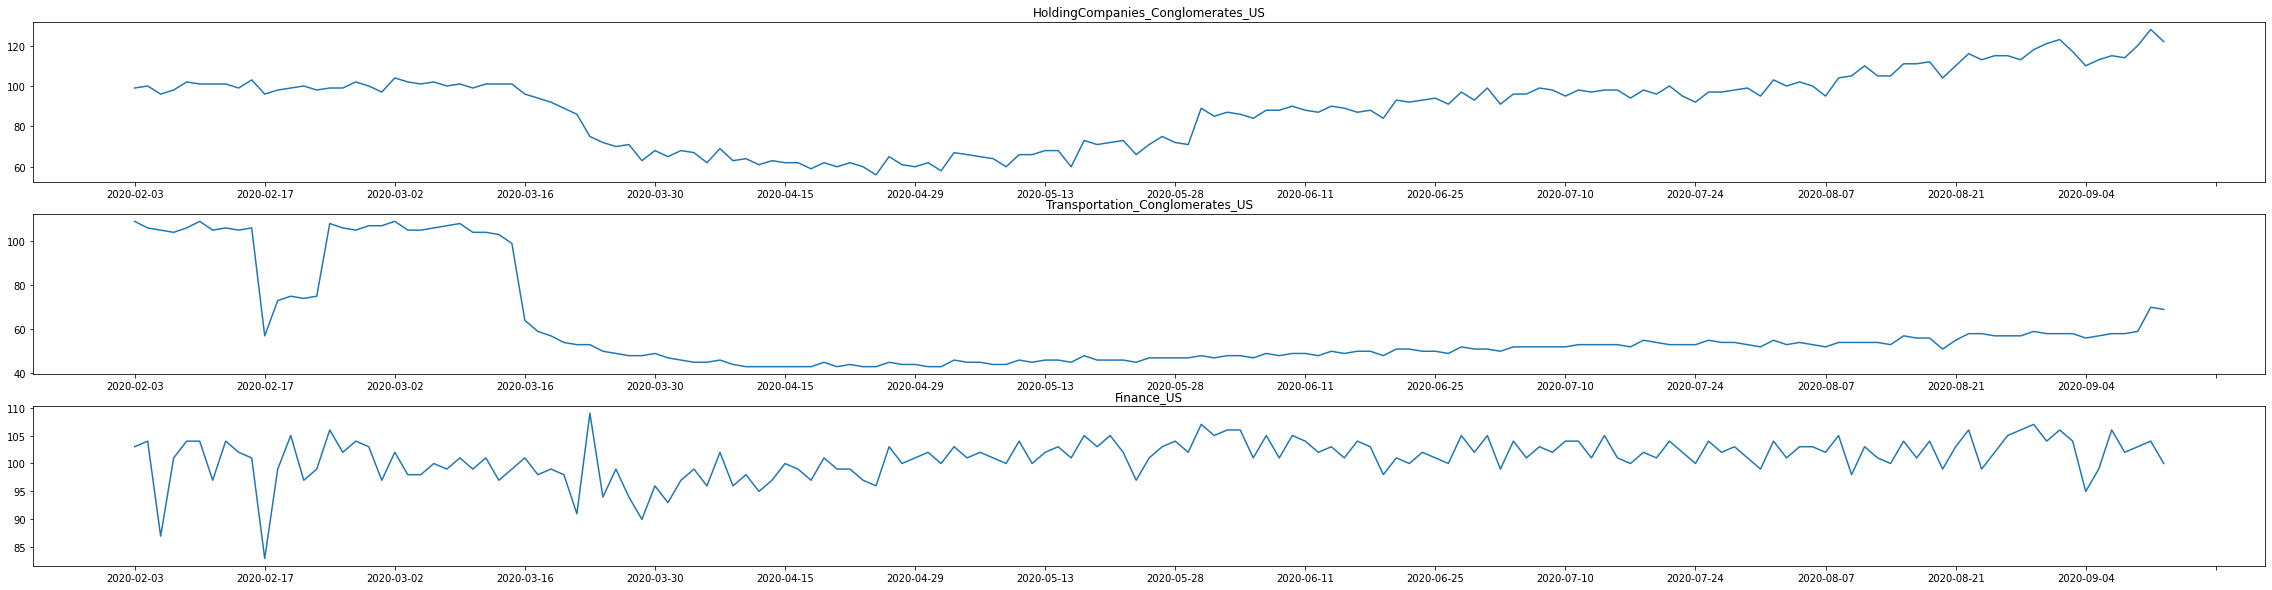

In [ ]:
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(left_join_us['date'], left_join_us['HoldingCompanies_Conglomerates_US'])
ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax0.title.set_text('HoldingCompanies_Conglomerates_US')

ax1 = fig.add_subplot(312)
ax1.plot(left_join_us['date'], left_join_us['Transportation_Conglomerates_US'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.title.set_text('Transportation_Conglomerates_US')

ax2 = fig.add_subplot(313)
ax2.plot(left_join_us['date'],left_join_us['Finance_US'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.title.set_text('Finance_US')
plt.show()

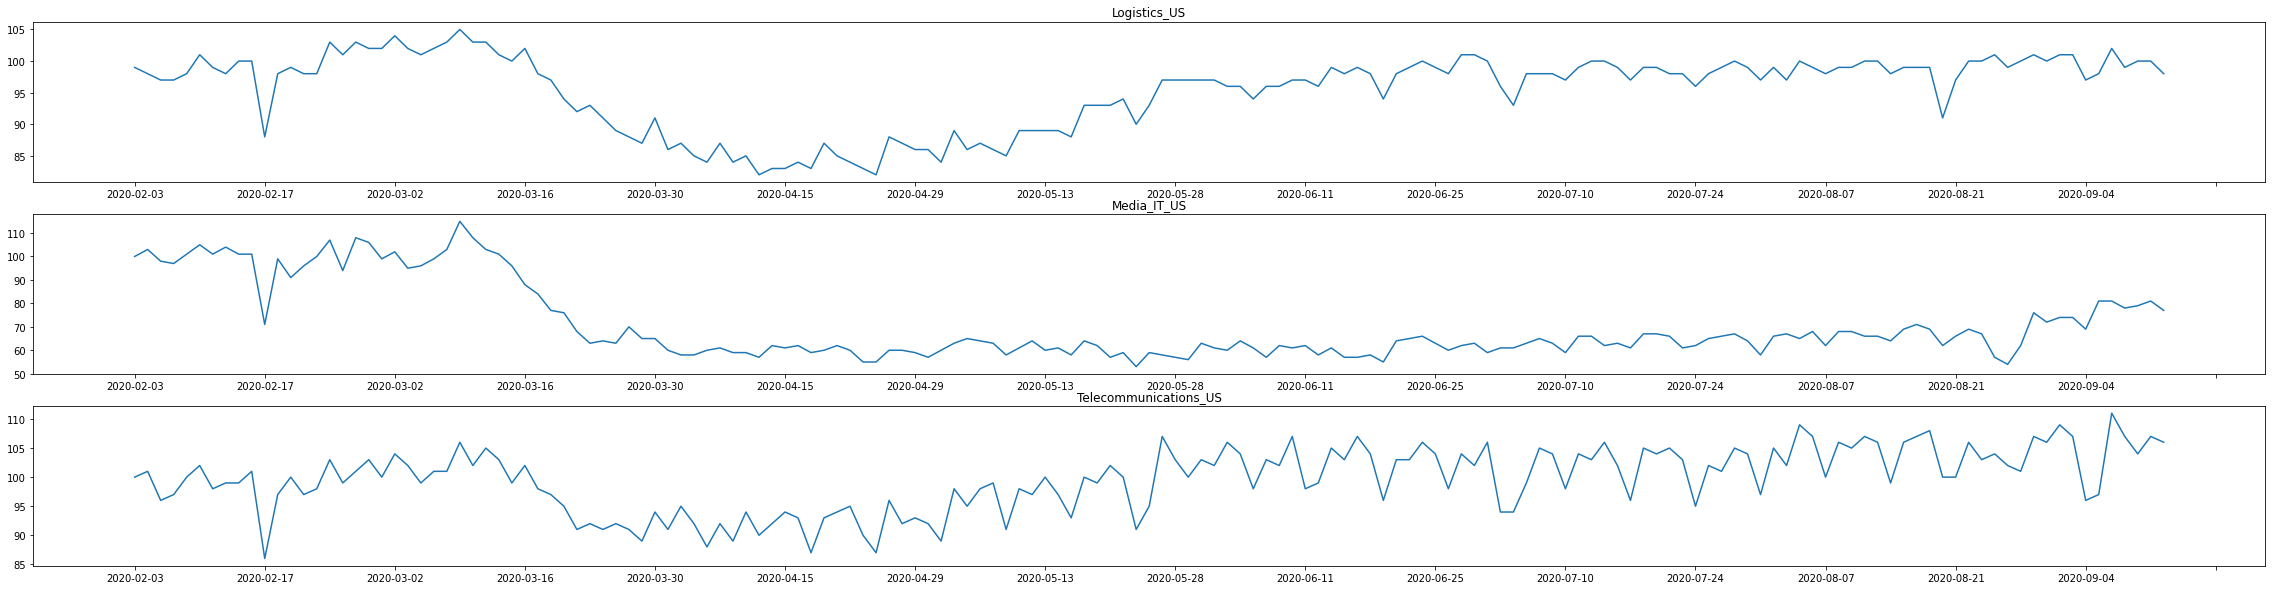

In [ ]:
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(left_join_us['date'], left_join_us['Logistics_US'])
ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax0.title.set_text('Logistics_US')

ax1 = fig.add_subplot(312)
ax1.plot(left_join_us['date'], left_join_us['Media_IT_US'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.title.set_text('Media_IT_US')

ax2 = fig.add_subplot(313)
ax2.plot(left_join_us['date'],left_join_us['Telecommunications_US'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.title.set_text('Telecommunications_US')
plt.show()

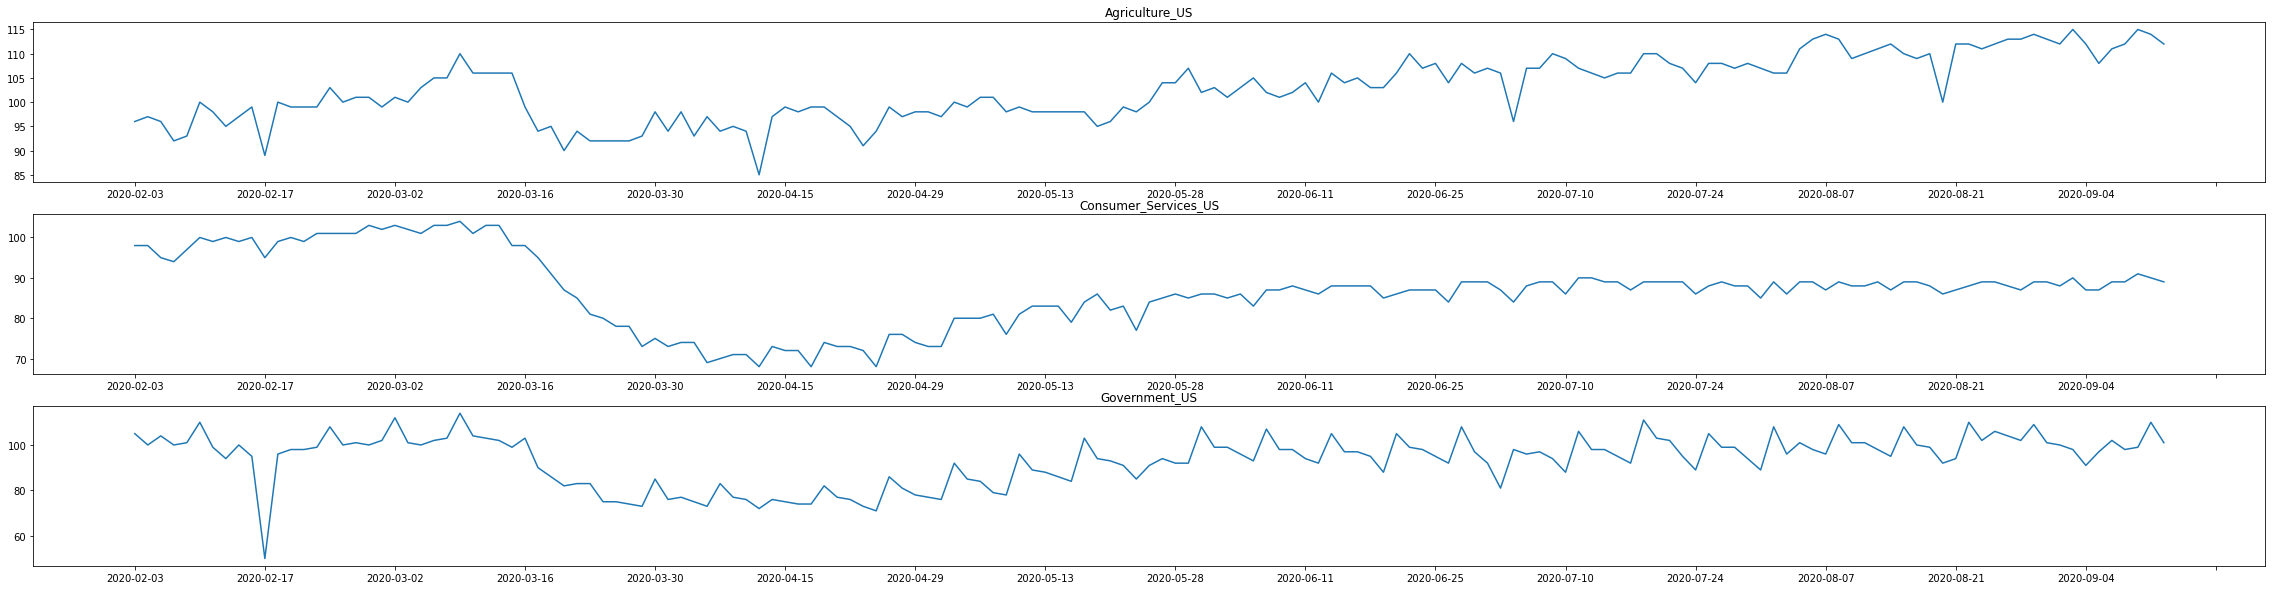

In [ ]:
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(left_join_us['date'], left_join_us['Agriculture_US'])
ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax0.title.set_text('Agriculture_US')

ax1 = fig.add_subplot(312)
ax1.plot(left_join_us['date'], left_join_us['Consumer_Services_US'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.title.set_text('Consumer_Services_US')

ax2 = fig.add_subplot(313)
ax2.plot(left_join_us['date'],left_join_us['Government_US'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.title.set_text('Government_US')
plt.show()

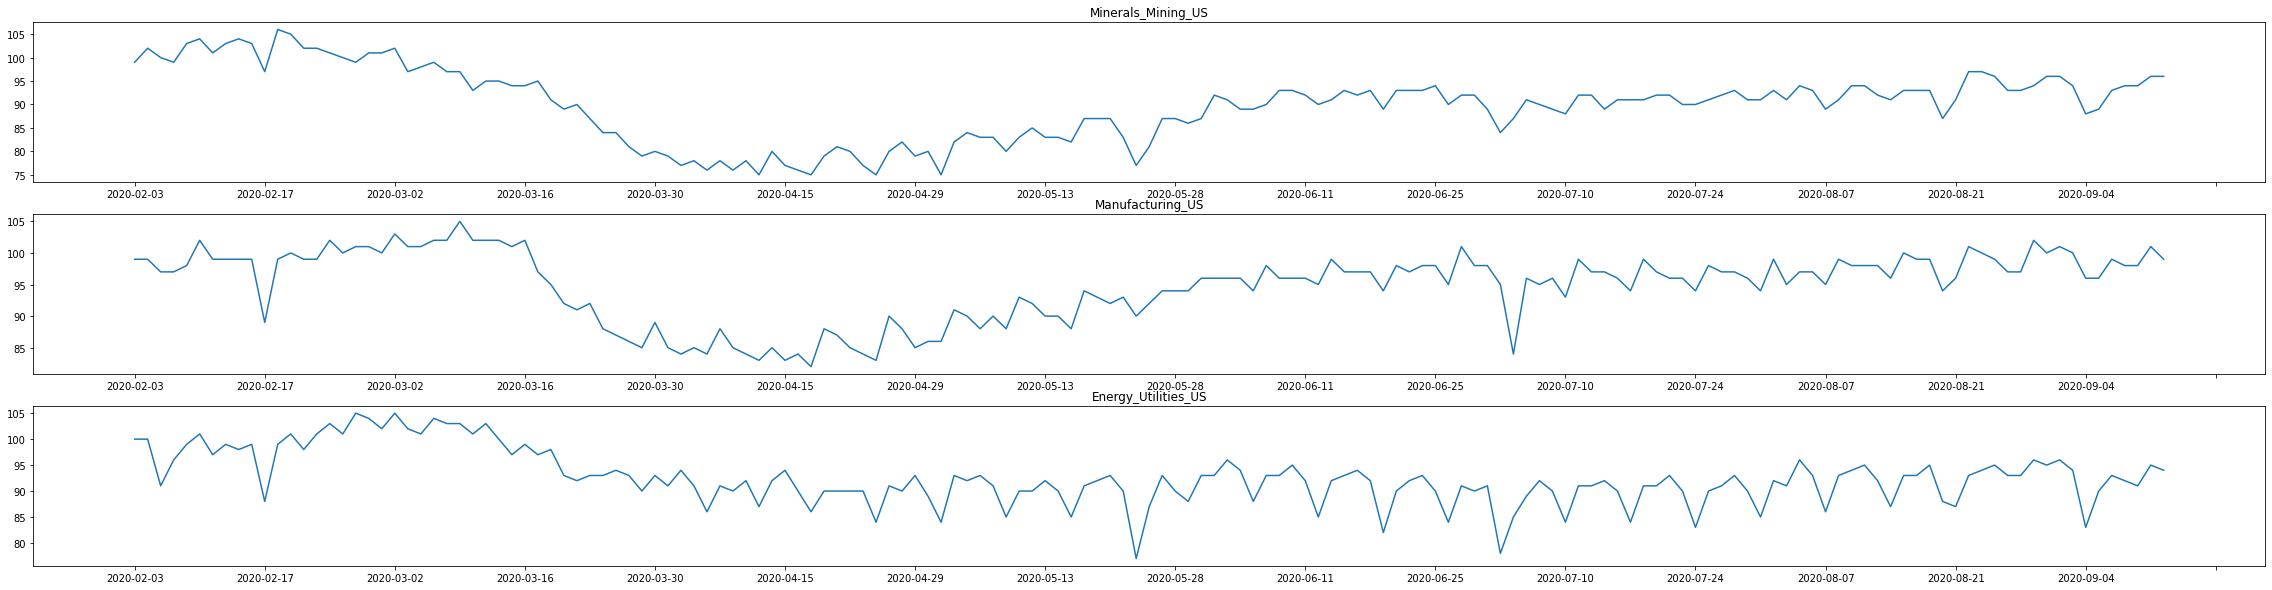

In [ ]:
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(left_join_us['date'], left_join_us['Minerals_Mining_US'])
ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax0.title.set_text('Minerals_Mining_US')

ax1 = fig.add_subplot(312)
ax1.plot(left_join_us['date'], left_join_us['Manufacturing_US'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.title.set_text('Manufacturing_US')

ax2 = fig.add_subplot(313)
ax2.plot(left_join_us['date'],left_join_us['Energy_Utilities_US'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.title.set_text('Energy_Utilities_US')
plt.show()

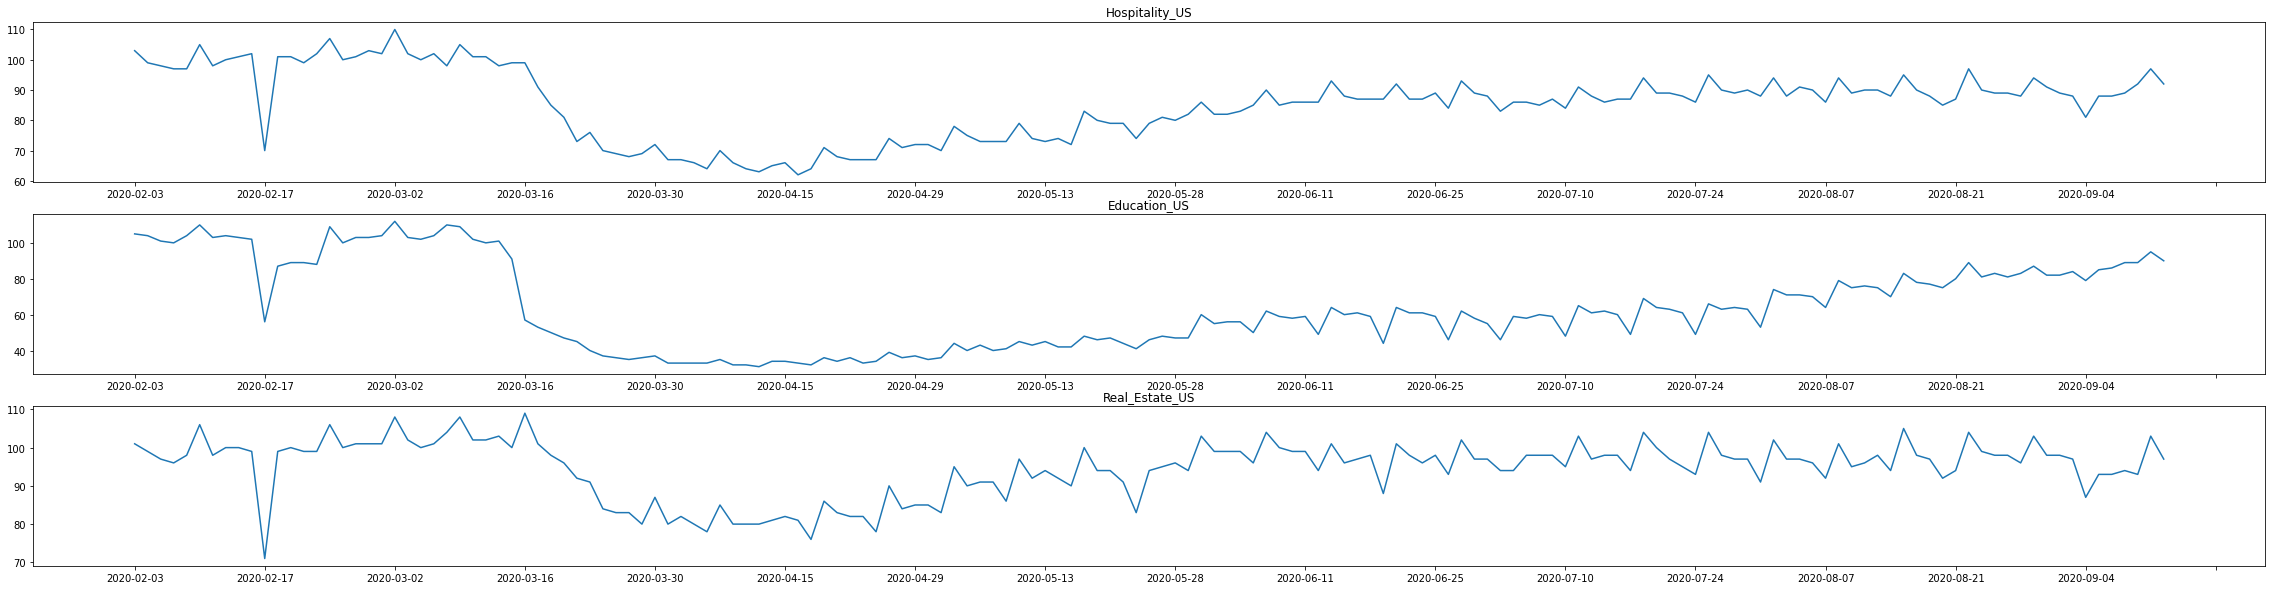

In [ ]:
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(left_join_us['date'], left_join_us['Hospitality_US'])
ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax0.title.set_text('Hospitality_US')

ax1 = fig.add_subplot(312)
ax1.plot(left_join_us['date'], left_join_us['Education_US'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.title.set_text('Education_US')

ax2 = fig.add_subplot(313)
ax2.plot(left_join_us['date'],left_join_us['Real_Estate_US'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.title.set_text('Real_Estate_US')
plt.show()

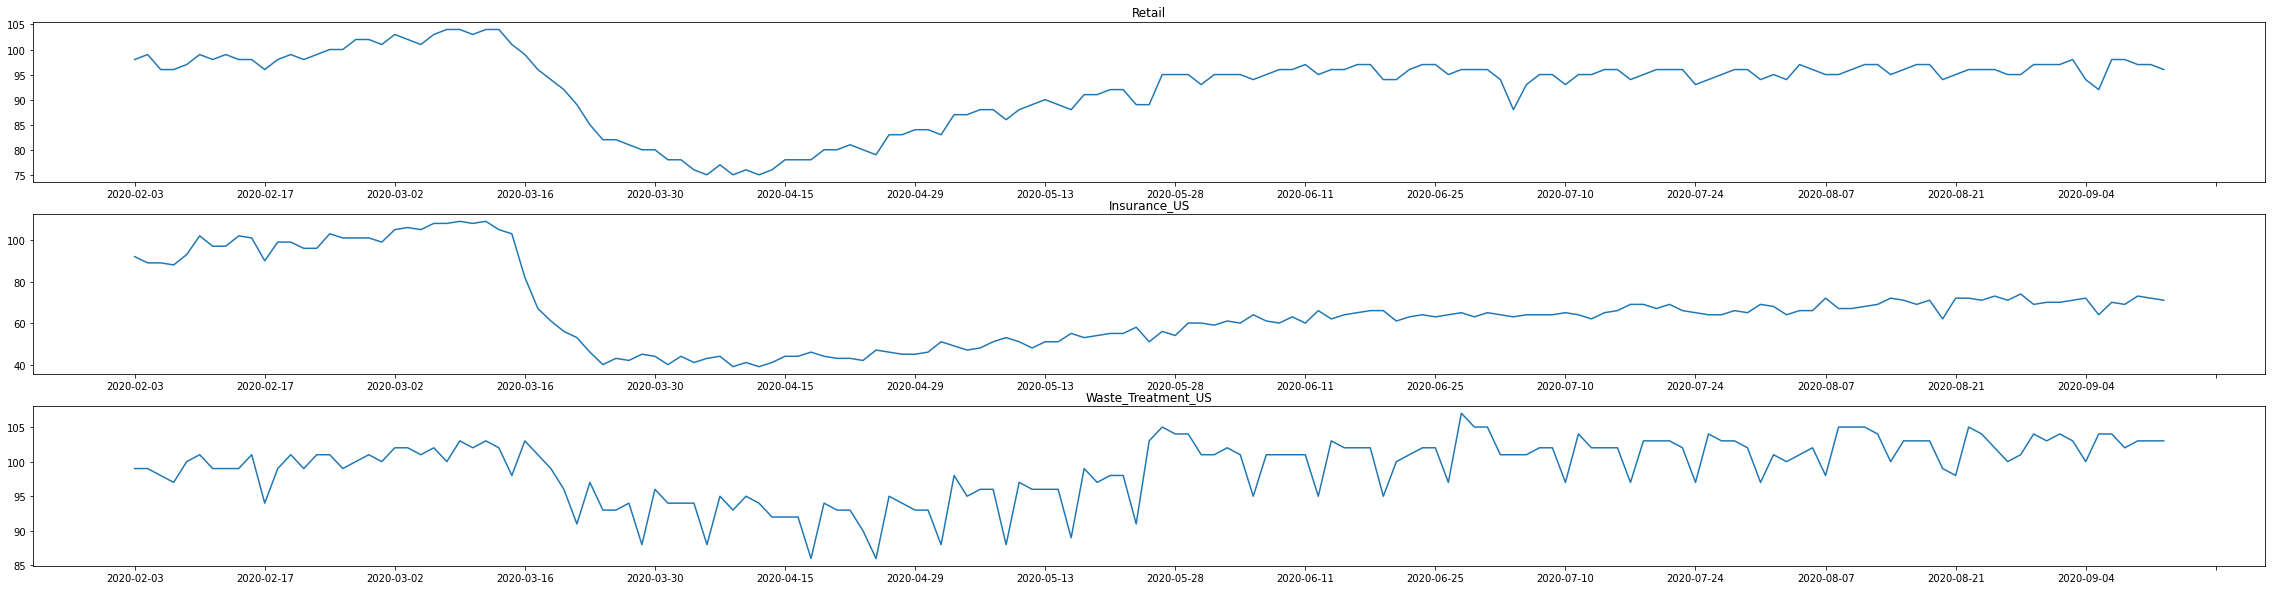

In [ ]:
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(left_join_us['date'], left_join_us['Retail'])
ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax0.title.set_text('Retail')

ax1 = fig.add_subplot(312)
ax1.plot(left_join_us['date'], left_join_us['Insurance_US'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.title.set_text('Insurance_US')

ax2 = fig.add_subplot(313)
ax2.plot(left_join_us['date'],left_join_us['Waste_Treatment_US'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.title.set_text('Waste_Treatment_US')
plt.show()

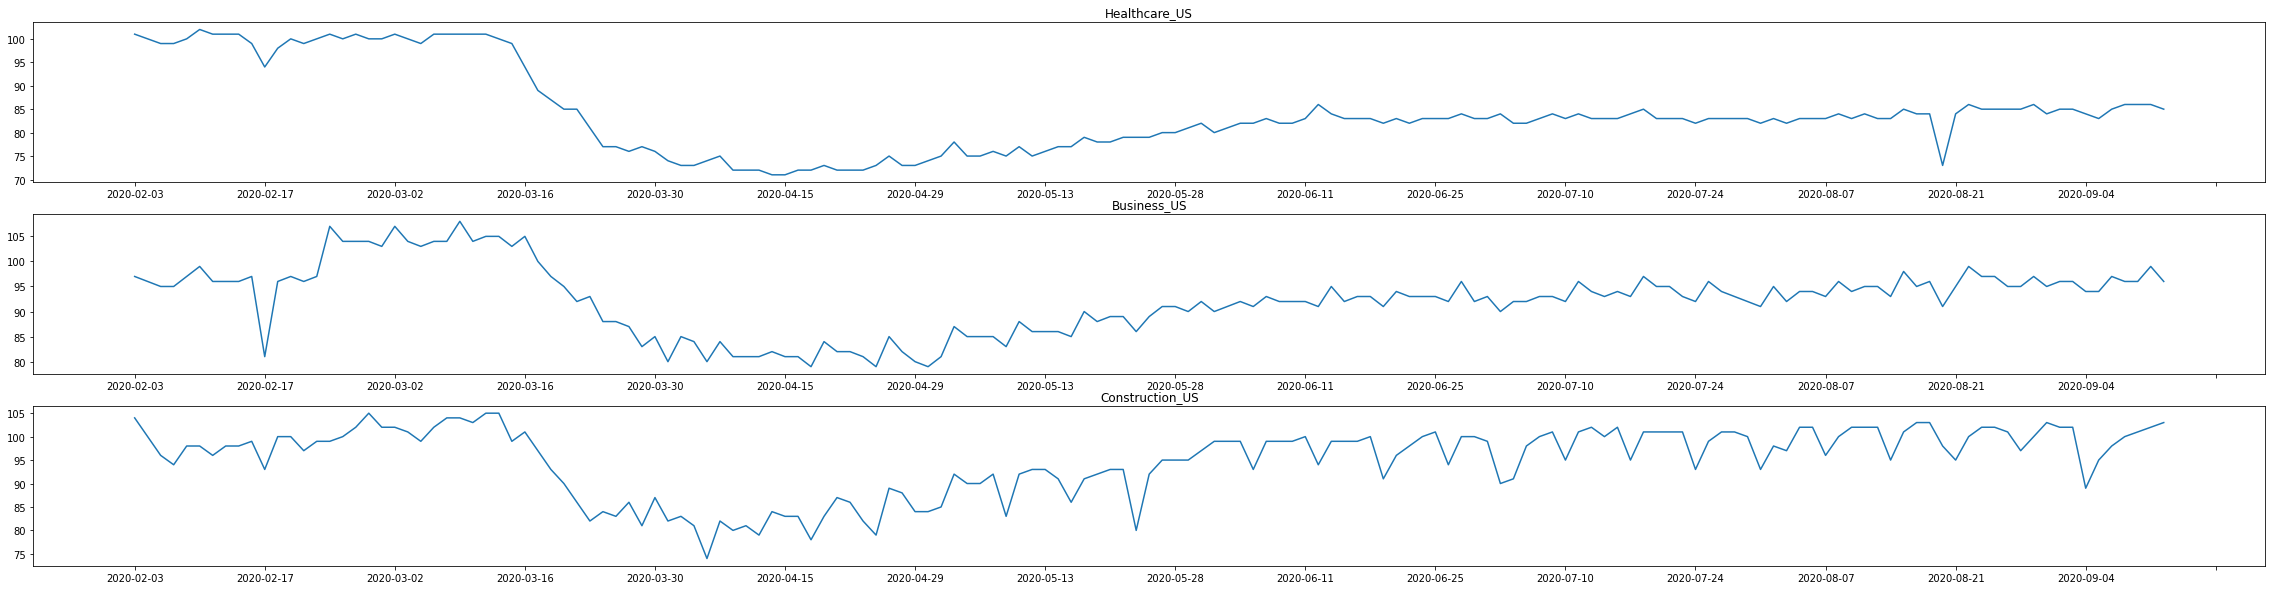

In [ ]:
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")
fig = plt.figure(figsize=(40,10))
ax0 = fig.add_subplot(311)
ax0.plot(left_join_us['date'], left_join_us['Healthcare_US'])
ax0.xaxis.set_major_locator(plt.MaxNLocator(20))
ax0.title.set_text('Healthcare_US')

ax1 = fig.add_subplot(312)
ax1.plot(left_join_us['date'], left_join_us['Business_US'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax1.title.set_text('Business_US')

ax2 = fig.add_subplot(313)
ax2.plot(left_join_us['date'],left_join_us['Construction_US'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.title.set_text('Construction_US')
plt.show()

**Filter the data with date prior to '2020-03-11'**

In [ ]:
prior_date =  left_join_us[(left_join_us['date']<'2020-03-11')]

In [ ]:
prior_date.head(1)

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,Retail,Healthcare_US,Insurance_US,Waste_Treatment_US,Hospitality_US,Education_US,Real_Estate_US,Minerals_Mining_US,Manufacturing_US,Energy_Utilities_US,Agriculture_US,Consumer_Services_US,Government_US,Logistics_US,Media_IT_US,Telecommunications_US,HoldingCompanies_Conglomerates_US,Transportation_Conglomerates_US,Finance_US,Business_US,Construction_US
0,2020-02-03,3,0,11,0,98.0,101.0,92.0,99.0,103.0,105.0,101.0,99.0,99.0,100.0,96.0,98.0,105.0,99.0,100.0,100.0,99.0,109.0,103.0,97.0,104.0


In [ ]:
len(prior_date)

28

In [ ]:
# Testing the Stationarity
from statsmodels.tsa.stattools import adfuller


def test_stationarity(x):
    # Determing rolling statistics
    rolmean = x.rolling(window=22, center=False).mean()

    rolstd = x.rolling(window=12, center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(x, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey Fuller test
    result = adfuller(x)
    print('ADF Stastistic: %f' % result[0])
    print('p-value: %f' % result[1])
    pvalue = result[1]
    for key, value in result[4].items():
        if result[0] > value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f ' % (key, value))


In [ ]:
healthcare =[prior_date['date'],prior_date['Healthcare_US']]
healthcare_df = pd.DataFrame(healthcare) 
healthcare_df = pd.DataFrame.transpose(healthcare_df)

In [ ]:
insurance =[prior_date['date'],prior_date['Insurance_US']]
insurance_df = pd.DataFrame(insurance) 
insurance_df = pd.DataFrame.transpose(insurance_df)

In [ ]:
energy =[prior_date['date'],prior_date['Energy_Utilities_US']]
energy_df = pd.DataFrame(energy) 
energy_df = pd.DataFrame.transpose(energy_df)

In [ ]:
media =[prior_date['date'],prior_date['Media_IT_US']]
media_df = pd.DataFrame(media) 
media_df = pd.DataFrame.transpose(media_df)

In [ ]:
transportation =[prior_date['date'],prior_date['Transportation_Conglomerates_US']]
transportation_df = pd.DataFrame(transportation) 
transportation_df = pd.DataFrame.transpose(transportation_df)

In [ ]:
agr =[prior_date['date'],prior_date['Agriculture_US']]
agr_df = pd.DataFrame(agr) 
agr_df = pd.DataFrame.transpose(agr_df)

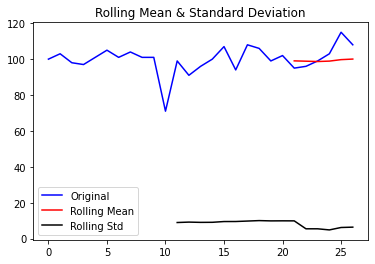

ADF Stastistic: -4.214833
p-value: 0.000622
The graph is stationery
Critical values:
	1%: -3.711 
	5%: -2.981 
	10%: -2.630 


In [ ]:
test_stationarity(media_df['Media_IT_US'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
!pip3 install pyramid.arima

     |████████████████████████████████| 604kB 2.9MB/s 


In [ ]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(agr_df['Agriculture_US'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=91.442, BIC=92.720, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=90.772, BIC=93.329, Fit time=0.215 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=90.183, BIC=92.101, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=88.035, BIC=90.591, Fit time=0.068 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=87.482, BIC=90.677, Fit time=0.311 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=91.123, BIC=95.596, Fit time=0.455 

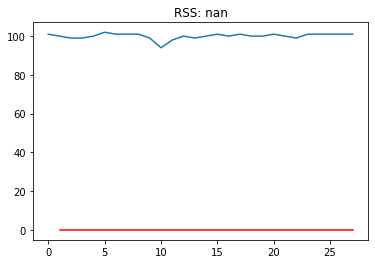

In [ ]:
model = ARIMA(ts, order=(0, 1, 0))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts)**2))
plt.show()

In [ ]:
agr_forecast = stepwise_model.predict(n_periods=60)

In [ ]:
datelist = pd.date_range(startdate, periods=60).tolist()
len(datelist)

60

In [ ]:
for i in range(0,len(agr_forecast)-1):
    new_row = [str(datelist[i].date()), float(agr_forecast[i])]
    print(new_row)
    #insurance_df['date'].iloc[28+i] = str(datelist[i].date())
   # insurance_df['Insurance_US'].iloc[28+i] = insurance_future_forecast[i]
    new_date.append(new_row)

['2020-03-11', 111.18067146464733]
['2020-03-12', 108.51991059358741]
['2020-03-13', 109.8591497225275]
['2020-03-14', 110.19838885146758]
['2020-03-15', 108.53762798040768]
['2020-03-16', 110.87686710934777]
['2020-03-17', 110.21610623828785]
['2020-03-18', 113.55534536722794]
['2020-03-19', 115.89458449616802]
['2020-03-20', 116.2338236251081]
['2020-03-21', 121.5730627540482]
['2020-03-22', 117.91230188298826]
['2020-03-23', 123.43221247657569]
['2020-03-24', 121.11069073445586]
['2020-03-25', 122.78916899233602]
['2020-03-26', 123.4676472502162]
['2020-03-27', 122.14612550809638]
['2020-03-28', 124.82460376597653]
['2020-03-29', 124.50308202385672]
['2020-03-30', 128.1815602817369]
['2020-03-31', 130.86003853961705]
['2020-04-01', 131.5385167974972]
['2020-04-02', 137.2169950553774]
['2020-04-03', 133.89547331325755]
['2020-04-04', 139.75462303578504]
['2020-04-05', 137.7723404226053]
['2020-04-06', 139.79005780942555]
['2020-04-07', 140.80777519624584]
['2020-04-08', 139.825492583

In [ ]:
new_date = []

In [ ]:
new_date = pd.DataFrame(new_date,columns=['date','Agriculture_US'])

In [ ]:
new_date

,date,Agriculture_US
0,2020-03-11,111.180671
1,2020-03-12,108.519911
2,2020-03-13,109.859150
3,2020-03-14,110.198389
4,2020-03-15,108.537628
5,2020-03-16,110.876867
6,2020-03-17,110.216106
7,2020-03-18,113.555345
8,2020-03-19,115.894584
9,2020-03-20,116.233824


In [ ]:
temp = [agr_df, new_date]

#concatenate dataframes
agr_df = pd.concat(temp, sort=False)

In [ ]:
agr_df

,date,Agriculture_US
0,2020-02-03,96
1,2020-02-04,97
2,2020-02-05,96
3,2020-02-06,92
4,2020-02-07,93
...,...,...
54,2020-05-04,191.789
55,2020-05-05,196.485
56,2020-05-06,200.182
57,2020-05-07,201.878


In [ ]:
startdate = "03/11/2020"

In [ ]:
for i in range(0,len(datelist)-1):
  healthcare_df['date'].iloc[28+i] = str(datelist[i].date())

In [ ]:
# healthcare | insurance2 | energy2 | media2 | trans |agri
col_list_keep = ['date', 'Agriculture_US']
agri = left_join_us[col_list_keep]
agri

,date,Agriculture_US
0,2020-02-03,96.0
1,2020-02-04,97.0
2,2020-02-05,96.0
3,2020-02-06,92.0
4,2020-02-07,93.0
...,...,...
152,2020-09-09,111.0
153,2020-09-10,112.0
154,2020-09-11,115.0
155,2020-09-14,114.0


In [ ]:
compare_data = pd.merge(media_df, media2, on='date')
compare_data

,date,Media_IT_US_x,Media_IT_US_y
0,2020-02-03,100,100.0
1,2020-02-04,103,103.0
2,2020-02-05,98,98.0
3,2020-02-06,97,97.0
4,2020-02-07,101,101.0
...,...,...,...
63,2020-05-04,472.75,63.0
64,2020-05-05,436.88,65.0
65,2020-05-06,491.736,64.0
66,2020-05-07,477.868,63.0


In [ ]:
compare_data['Media_IT_US_x'].mean()

203.59530182060357

In [ ]:
compare_data['Media_IT_US_y'].mean()

79.41176470588235

In [ ]:
(129.41-97.63)/129.41

0.24557607603740053

In [ ]:
(203.59-79.41)/203.59

0.609951372857213

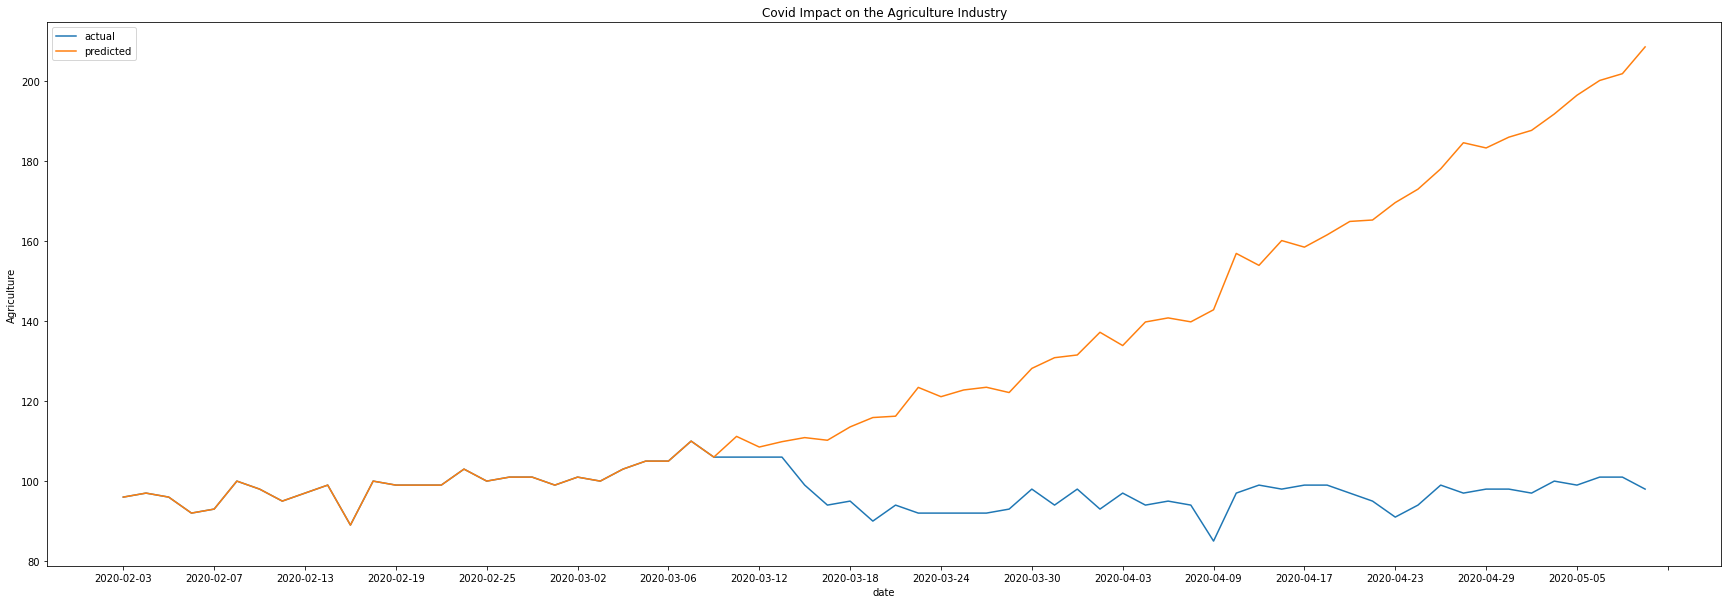

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(compare_data['date'], compare_data['Agriculture_US_y'], label = "actual")
ax.plot(compare_data['date'], compare_data['Agriculture_US_x'], label = "predicted")
plt.xlabel('date')
plt.ylabel('Agriculture')
plt.title('Covid Impact on the Agriculture Industry')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend()
plt.show()

In [ ]:
end_date =  left_join_us[(left_join_us['date']<='2020-05-10')]

In [ ]:
left_join_us

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,Retail,Healthcare_US,Insurance_US,Waste_Treatment_US,Hospitality_US,Education_US,Real_Estate_US,Minerals_Mining_US,Manufacturing_US,Energy_Utilities_US,Agriculture_US,Consumer_Services_US,Government_US,Logistics_US,Media_IT_US,Telecommunications_US,HoldingCompanies_Conglomerates_US,Transportation_Conglomerates_US,Finance_US,Business_US,Construction_US
0,2020-02-03,3,0,11,0,98.0,101.0,92.0,99.0,103.0,105.0,101.0,99.0,99.0,100.0,96.0,98.0,105.0,99.0,100.0,100.0,99.0,109.0,103.0,97.0,104.0
1,2020-02-04,0,0,11,0,99.0,100.0,89.0,99.0,99.0,104.0,99.0,102.0,99.0,100.0,97.0,98.0,100.0,98.0,103.0,101.0,100.0,106.0,104.0,96.0,100.0
2,2020-02-05,0,0,11,0,96.0,99.0,89.0,98.0,98.0,101.0,97.0,100.0,97.0,91.0,96.0,95.0,104.0,97.0,98.0,96.0,96.0,105.0,87.0,95.0,96.0
3,2020-02-06,1,0,12,0,96.0,99.0,88.0,97.0,97.0,100.0,96.0,99.0,97.0,96.0,92.0,94.0,100.0,97.0,97.0,97.0,98.0,104.0,101.0,95.0,94.0
4,2020-02-07,0,0,12,0,97.0,100.0,93.0,100.0,97.0,104.0,98.0,103.0,98.0,99.0,93.0,97.0,101.0,98.0,101.0,100.0,102.0,106.0,104.0,97.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2020-09-09,27122,471,6327793,189679,98.0,85.0,70.0,104.0,88.0,86.0,93.0,93.0,99.0,93.0,111.0,89.0,102.0,102.0,81.0,111.0,115.0,58.0,106.0,97.0,98.0
153,2020-09-10,31927,1136,6359720,190815,98.0,86.0,69.0,102.0,89.0,89.0,94.0,94.0,98.0,92.0,112.0,89.0,98.0,99.0,78.0,107.0,114.0,58.0,102.0,96.0,100.0
154,2020-09-11,37507,974,6397227,191789,97.0,86.0,73.0,103.0,92.0,89.0,93.0,94.0,98.0,91.0,115.0,91.0,99.0,100.0,79.0,104.0,120.0,59.0,103.0,96.0,101.0
155,2020-09-14,33871,378,6519979,194079,97.0,86.0,72.0,103.0,97.0,95.0,103.0,96.0,101.0,95.0,114.0,90.0,110.0,100.0,81.0,107.0,128.0,70.0,104.0,99.0,102.0


In [ ]:
len(end_date)

68

<Figure size 14400x36000 with 0 Axes>

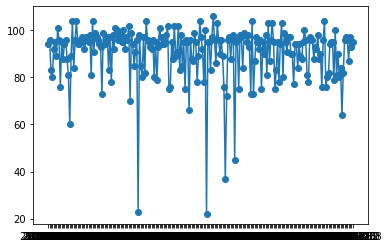

<Figure size 14400x36000 with 0 Axes>

In [ ]:
plt.plot(Retail_US['date'],Retail_US['Retail'], marker='o')

In [ ]:
prior_date =  mobility_report[(mobility_report['date']<'2020-03-11')]

In [ ]:
residential =[prior_date['date'],prior_date['residential_percent_change_from_baseline']]
residential_df = pd.DataFrame(residential) 
residential_df = pd.DataFrame.transpose(residential_df)

In [ ]:
residential_df = residential_df.dropna()

In [ ]:
residential_future_forecast = stepwise_model.predict(n_periods=60)

In [ ]:
new_date = []

In [ ]:
for i in range(0,len(trans_future_forecast)-1):
    new_row = [str(datelist[i].date()), float(trans_future_forecast[i])]
    print(new_row)
    #insurance_df['date'].iloc[28+i] = str(datelist[i].date())
   # insurance_df['Insurance_US'].iloc[28+i] = insurance_future_forecast[i]
    new_date.append(new_row)

In [ ]:
parks =[prior_date['date'],prior_date['parks_percent_change_from_baseline']]
parks_df = pd.DataFrame(parks) 
parks_df = pd.DataFrame.transpose(parks_df)
parks_df = parks_df.dropna()
parks_df

,date,parks_percent_change_from_baseline
0,2020-02-15,-2
1,2020-02-16,2
2,2020-02-17,4
3,2020-02-18,1
4,2020-02-19,0
...,...,...
1181581,2020-03-04,-3
1181582,2020-03-05,-1
1181583,2020-03-06,10
1181584,2020-03-07,1


In [ ]:
retail =[prior_date['date'],prior_date['retail_and_recreation_percent_change_from_baseline']]
retail_df = pd.DataFrame(retail) 
retail_df = pd.DataFrame.transpose(retail_df)
retail_df = retail_df.dropna()
retail_df

,date,retail_and_recreation_percent_change_from_baseline
0,2020-02-15,1
1,2020-02-16,-2
2,2020-02-17,-3
3,2020-02-18,-3
4,2020-02-19,-3
...,...,...
2440018,2020-03-10,27
2440307,2020-02-16,-4
2440308,2020-02-23,-12
2440309,2020-03-01,-3
